# Table of Contents
1. Introduction
2. Import
3. Analysis & Preprocessing
4. Model
5. Training
6. Analysis & Conclusion

# 1. Introduction
References:
- https://scikit-learn.org/stable/modules/tree.html
- https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-decision-tree-classification-using-python/

# 2. Import

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

# 2. Analysis & Prepocessing

In [18]:
data = pd.read_csv('../../data_sets/fetal_health.csv')

scaler = StandardScaler()

scaler.fit(data.drop('fetal_health', axis=1))
data_scaled = scaler.transform(data.drop('fetal_health', axis=1))

data_scaled = pd.DataFrame(data_scaled, columns = data.columns[:-1])

data.head(5)
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [19]:
encoder = LabelEncoder()
encoder.fit(data["fetal_health"])
encodedY = encoder.transform(data["fetal_health"])
data_labels = np_utils.to_categorical(encodedY)

In [20]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(data_scaled, data_labels, test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1700, 21)
y_train shape is: (1700, 3) 

x_val shape is: (319, 21)
y_val shape is: (319, 3) 

x_test shape is: (107, 21)
y_test shape is: (107, 3)


# 4. Model

In [21]:
model = DecisionTreeClassifier(splitter ='best')

# 5. Training

In [22]:
hist = model.fit(x_train, y_train)

# 6. Analysis & Conclusion

In [23]:
#Calculating Details
print('Decision Tree Model: Train Score is : ' , model.score(x_train, y_train))
print('Decision Tree Model: Val Score is : ' , model.score(x_val, y_val))
print('Decision Tree Model:  Classes are : ' , model.classes_)
print('----------------------------------------------------')

Decision Tree Model: Train Score is :  0.9988235294117647
Decision Tree Model: Val Score is :  0.9404388714733543
Decision Tree Model:  Classes are :  [array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32)]
----------------------------------------------------


In [30]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)

print(classification_report(y_label, y_pred, target_names=['normal', 'suspect', 'pathological'] ))

              precision    recall  f1-score   support

      normal       0.94      0.96      0.95        83
     suspect       0.75      0.71      0.73        17
pathological       0.83      0.71      0.77         7

    accuracy                           0.91       107
   macro avg       0.84      0.79      0.82       107
weighted avg       0.90      0.91      0.90       107



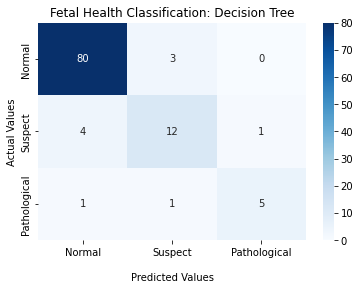

In [25]:
confusion = sb.heatmap(confusion_matrix(y_label, y_pred), annot=True, cmap='Blues')
confusion.set_title("Fetal Health Classification: Decision Tree")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

plt.show()

In [26]:
conf_mat = confusion_matrix(y_label, y_pred)
print(conf_mat)

TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

print (TP, TN, FP, FN)

[[80  3  0]
 [ 4 12  1]
 [ 1  1  5]]
12 80 3 4
